<a href="https://colab.research.google.com/github/Mattshanevdberg/ML-FruitPunchAI_BootCamp/blob/main/5_1_AutoML_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

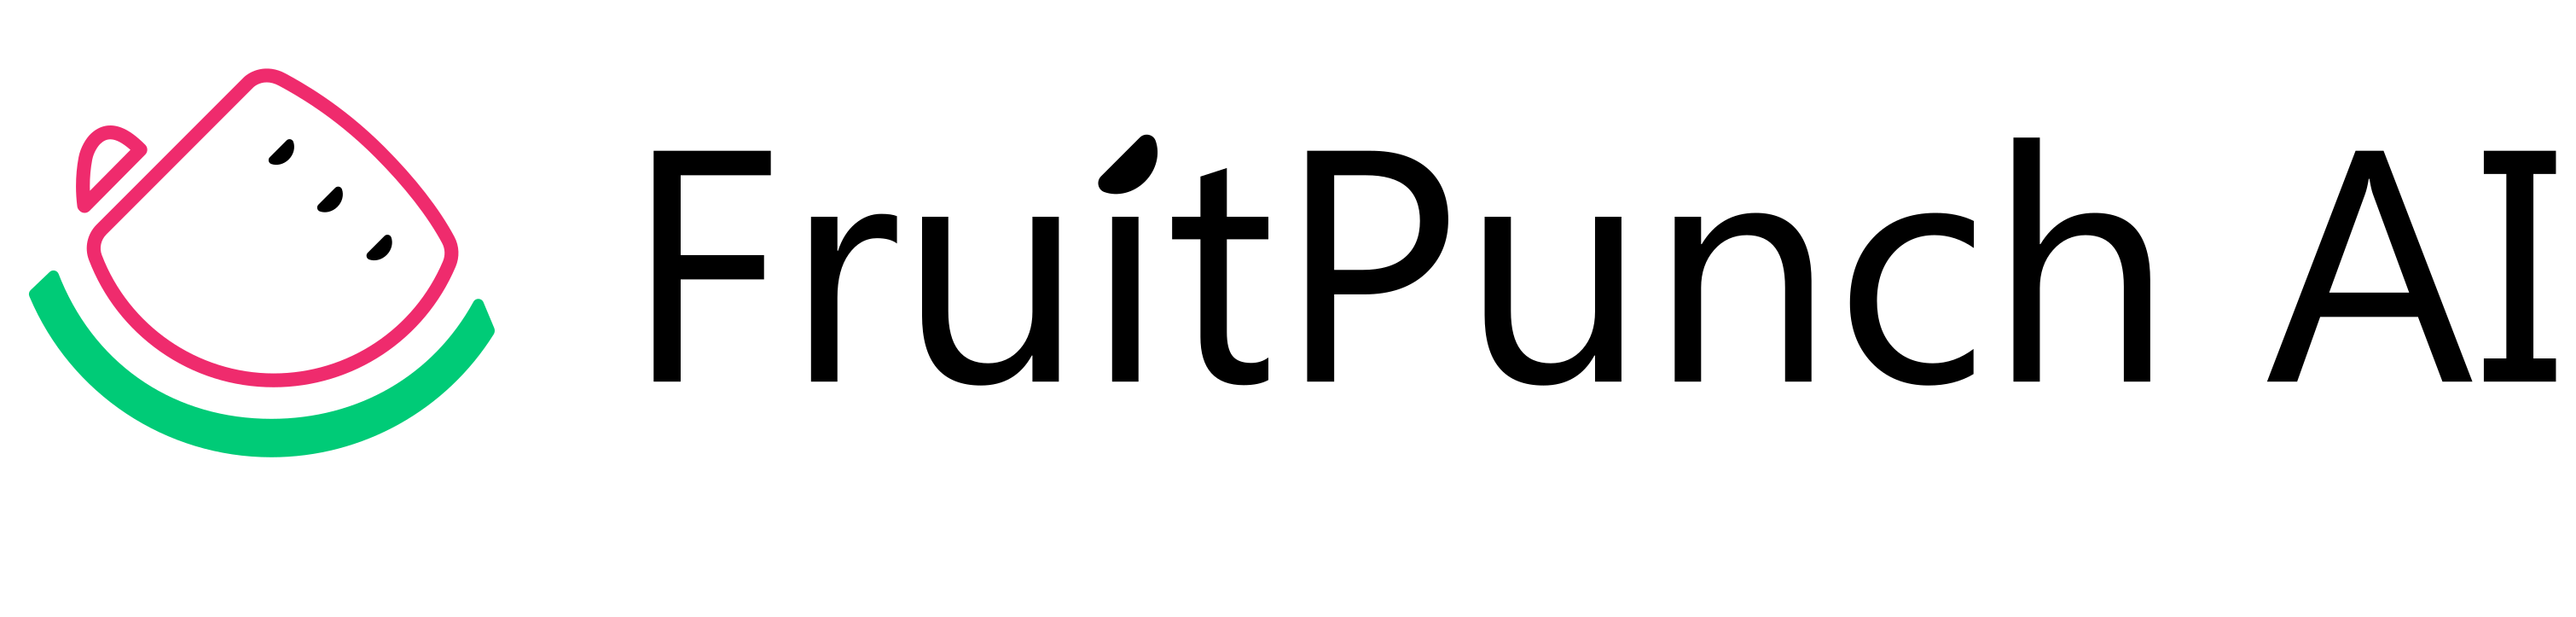

In [1]:
!pip install auto-sklearn -q
!pip install openml -q
!pip install PipelineProfiler -q
!pip install H2O -q
!pip install gama -q
!pip install transformers -q
!pip install datasets -q
# restart runtime after installing

     |████████████████████████████████| 6.5 MB 12.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 24.9 MB 1.4 MB/s 
     |████████████████████████████████| 4.4 MB 47.0 MB/s 
     |████████████████████████████████| 260 kB 74.5 MB/s 
     |████████████████████████████████| 4.9 MB 52.9 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
     |████████████████████████████████| 140 kB 33.6 MB/s 
     |████████████████████████████████| 76 kB 137 kB/s 
     |████████████████████████████████| 881 kB 31.9 MB/s 
     |████████████████████████████████| 1.6 MB 54.8 MB/s 
     |███████████████

# Part 1 AutoML

We'll walk you through some extremely useful AutoML libraries. Knowing how to use that will potentially take a lot of work out of your hands. Let's start with some AutoML!

In [3]:
# First we are going to take a look at the autosklearn library
# Restart runtime if it craches 
from autosklearn.classification import AutoSklearnClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the data set and split
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### **Assignment 1**

A) Have a look at the shape of the data

B) What are the numbers suposed to mean in each instance?

C) Look up https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html 

D) Create a plot that visualises a digit

In [8]:
#A)
print("X_train shape:", X_train.shape)
print("X_train dtype:", X_train.dtype)
print("y_train shape:", y_train.shape)
print("y_train dtype:", y_train.dtype)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1347, 64)
X_train dtype: float64
y_train shape: (1347,)
y_train dtype: int64
X_test shape: (450, 64)
y_test shape: (450,)


In [ ]:
#B)What are the numbers suposed to mean in each instance?
#This means that we have a 64 bit flattened image, therefore the image is an 8x8 image in grey scale (no colour). And an int as a y value which is the cvalue of the hand drawn image.

<Figure size 432x288 with 0 Axes>

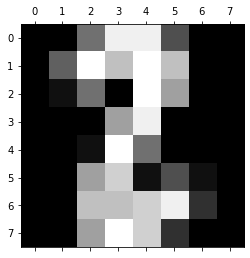

In [11]:
#D) Create a plot that visualises a digit
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(X_train[0].reshape(8,8))
plt.show()

Alright, now we are going to train a classifier using auto-sklearn to classify each number. Run the following code. It should take around a minute. (Make sure your connected with a GPU)

In [ ]:
automl = AutoSklearnClassifier(
    time_left_for_this_task=60, # sec., how long should this seed fit process run
    per_run_time_limit=15, # sec., each model may only take this long before it's killed
)

automl.fit(X_train, y_train)
y_pred = automl.predict(X_test)
print("Accuracy score", accuracy_score(y_test, y_pred))

Accuracy score 0.9888888888888889


Okay.... Looks cool! But how do we know now what our model looks like? And on what parameters it is tuned?

### **Assignment 2**

A) Look up in the manual how to inspect your results https://automl.github.io/auto-sklearn/master/manual.html 

B) What model perfroms best?

C) Find the parameters set for you model

D) Look up PipelineProfiler and run it to inspect your trained autoML

In [ ]:
# Print the final ensemble constructed by auto-sklearn.
print(automl.show_models())
# Print statistics about the auto-sklearn run such as number of
# iterations, number of models failed with a time out.
print(automl.sprint_statistics())

{3: {'model_id': 3, 'rank': 1, 'cost': 0.011235955056179803, 'ensemble_weight': 0.16, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f828cb69f10>, 'balancing': Balancing(random_state=1, strategy='weighting'), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f828ac86c50>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f828abfc350>, 'sklearn_classifier': SVC(C=21.59109048521139, cache_size=1897.8229166666667, class_weight='balanced',
    gamma=5.060493057005212, max_iter=-1.0, random_state=1, shrinking=False,
    tol=0.00012027336497045934)}, 4: {'model_id': 4, 'rank': 2, 'cost': 0.013483146067415741, 'ensemble_weight': 0.22, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f828cb69090>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <auto

In [ ]:
from PipelineProfiler import import_autosklearn
from PipelineProfiler import plot_pipeline_matrix

profiler_data= import_autosklearn(automl)
plot_pipeline_matrix(profiler_data)

### Next up we'll use the [H2O](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html ) AutoML library 

Below you find a classification example of using H2O AutoML. You can run the code to generate the results but this can take up to 30 minutes. 

In [ ]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

# The leader model is stored here
aml.leader

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp_2f4g68o
  JVM stdout: /tmp/tmp_2f4g68o/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp_2f4g68o/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_unknownUser_ognzny
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220611_115521

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.0800768219265049
RMSE: 0.2829784831511133
LogLoss: 0.298792486857042
Null degrees of freedom: 9999
Residual degrees of freedom: 9989
Null deviance: 13828.113387424315
Residual deviance: 5975.849737140839
AIC: 5997.849737140839
AUC: 0.9841604224304804
AUCPR: 0.9856606919847443
Gini: 0.9683208448609608

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5086730145427164: 


,,0,1,Error,Rate
0,0,4331.0,374.0,0.0795,(374.0/4705.0)
1,1,294.0,5001.0,0.0555,(294.0/5295.0)
2,Total,4625.0,5375.0,0.0668,(668.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.508673,0.937395,203.0
1,max f2,0.408396,0.961489,237.0
2,max f0point5,0.597499,0.945913,172.0
3,max accuracy,0.508673,0.933200,203.0
4,max precision,0.994497,1.000000,0.0
5,max recall,0.235058,1.000000,302.0
6,max specificity,0.994497,1.000000,0.0
7,max absolute_mcc,0.508673,0.865918,203.0
8,max min_per_class_accuracy,0.526956,0.931067,196.0
9,max mean_per_class_accuracy,0.514731,0.932671,201.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.94 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.963452,1.888574,1.888574,1.000,0.973563,1.000000,0.973563,0.018886,0.018886,88.857413,88.857413,0.018886
1,2,0.02,0.954724,1.888574,1.888574,1.000,0.958192,1.000000,0.965878,0.018886,0.037771,88.857413,88.857413,0.037771
2,3,0.03,0.947707,1.888574,1.888574,1.000,0.951574,1.000000,0.961110,0.018886,0.056657,88.857413,88.857413,0.056657
3,4,0.04,0.940874,1.888574,1.888574,1.000,0.944188,1.000000,0.956879,0.018886,0.075543,88.857413,88.857413,0.075543
4,5,0.05,0.934404,1.888574,1.888574,1.000,0.937603,1.000000,0.953024,0.018886,0.094429,88.857413,88.857413,0.094429
5,6,0.10,0.905406,1.888574,1.888574,1.000,0.919740,1.000000,0.936382,0.094429,0.188857,88.857413,88.857413,0.188857
6,7,0.15,0.876822,1.888574,1.888574,1.000,0.891127,1.000000,0.921297,0.094429,0.283286,88.857413,88.857413,0.283286
7,8,0.20,0.846053,1.884797,1.887630,0.998,0.861111,0.999500,0.906251,0.094240,0.377526,88.479698,88.762984,0.377313
8,9,0.30,0.775175,1.875354,1.883538,0.993,0.812136,0.997333,0.874879,0.187535,0.565061,87.535411,88.353793,0.563361
9,10,0.40,0.685846,1.799811,1.862606,0.953,0.733171,0.986250,0.839452,0.179981,0.745042,79.981114,86.260623,0.733353




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18705497103187982
RMSE: 0.4324985214216111
LogLoss: 0.5512789732965584
Null degrees of freedom: 9999
Residual degrees of freedom: 9989
Null deviance: 13829.800684055186
Residual deviance: 11025.579465931167
AIC: 11047.579465931167
AUC: 0.7882110225695647
AUCPR: 0.8074754607233949
Gini: 0.5764220451391293

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3255872966684922: 


,,0,1,Error,Rate
0,0,2016.0,2689.0,0.5715,(2689.0/4705.0)
1,1,517.0,4778.0,0.0976,(517.0/5295.0)
2,Total,2533.0,7467.0,0.3206,(3206.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.325587,0.748785,283.0
1,max f2,0.189261,0.860286,343.0
2,max f0point5,0.608066,0.742143,160.0
3,max accuracy,0.549897,0.710500,184.0
4,max precision,0.988755,1.000000,0.0
5,max recall,0.047626,1.000000,392.0
6,max specificity,0.988755,1.000000,0.0
7,max absolute_mcc,0.608066,0.428009,160.0
8,max min_per_class_accuracy,0.525039,0.709671,195.0
9,max mean_per_class_accuracy,0.549897,0.712301,184.0



Gains/Lift Table: Avg response rate: 52.95 %, avg score: 52.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.946116,1.869688,1.869688,0.990,0.959092,0.990000,0.959092,0.018697,0.018697,86.968839,86.968839,0.018484
1,2,0.02,0.935278,1.831917,1.850803,0.970,0.940898,0.980000,0.949995,0.018319,0.037016,83.191690,85.080264,0.036166
2,3,0.03,0.923989,1.794145,1.831917,0.950,0.929525,0.970000,0.943172,0.017941,0.054958,79.414542,83.191690,0.053045
3,4,0.04,0.914912,1.813031,1.827195,0.960,0.919419,0.967500,0.937234,0.018130,0.073088,81.303116,82.719547,0.070325
4,5,0.05,0.905545,1.756374,1.813031,0.930,0.910581,0.960000,0.931903,0.017564,0.090652,75.637394,81.303116,0.086401
5,6,0.10,0.864076,1.673277,1.743154,0.886,0.885257,0.923000,0.908580,0.083664,0.174315,67.327668,74.315392,0.157950
6,7,0.15,0.823018,1.609065,1.698458,0.852,0.843977,0.899333,0.887046,0.080453,0.254769,60.906516,69.845766,0.222675
7,8,0.20,0.782969,1.541076,1.659112,0.816,0.803403,0.878500,0.866135,0.077054,0.331822,54.107649,65.911237,0.280175
8,9,0.30,0.703007,1.422096,1.580107,0.753,0.743574,0.836667,0.825281,0.142210,0.474032,42.209632,58.010702,0.369888
9,10,0.40,0.620135,1.212465,1.488196,0.642,0.661867,0.788000,0.784428,0.121246,0.595279,21.246459,48.819641,0.415045




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.683981,0.019016,0.705134,0.655957,0.689453,0.675124,0.694237
1,auc,0.788441,0.012379,0.794027,0.773636,0.786052,0.782214,0.806275
2,err,0.316019,0.019016,0.294866,0.344044,0.310547,0.324876,0.305763
3,err_count,632.200000,47.103077,603.000000,696.000000,636.000000,653.000000,573.000000
4,f0point5,0.683243,0.016519,0.703263,0.657732,0.687809,0.680650,0.686760
5,f1,0.751543,0.010977,0.760429,0.733333,0.759091,0.754972,0.749891
6,f2,0.835291,0.010906,0.827711,0.828571,0.846856,0.847515,0.825803
7,lift_top_group,1.871855,0.058903,1.879596,1.917536,1.786150,1.844037,1.931959
8,logloss,0.550994,0.012766,0.544976,0.566331,0.555665,0.555418,0.532580
9,max_per_class_error,0.562329,0.058544,0.493208,0.617769,0.571130,0.618478,0.511062



See the whole table with table.as_data_frame()


Now we'll try this on the [Combined Cycle Power Plant dataset.](https://www.kaggle.com/datasets/gova26/airpressure) The goal here is to predict the energy output (in megawatts), given the temperature, ambient pressure, relative humidity and exhaust vacuum values. In this demo, you will use H2O's AutoML to outperform the state of the art results on this task.

In [ ]:
import os 
data_path = "https://github.com/h2oai/h2o-tutorials/raw/master/h2o-world-2017/automl/data/powerplant_output.csv"

# Load data into H2O
df = h2o.import_file(data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


### **Assignment 3**

A) Use .describe() to get a sense of what the data looks like

H2O uses a different dataframe then your probably used to. H2OFrame is similar to pandas’ DataFrame, or R’s data.frame. One of the critical distinction is that the data is generally not held in memory, instead it is located on a (possibly remote) H2O cluster, and thus H2OFrame represents a mere handle to that data. Therefore you need to create specific H2) training and test frames.

B) Split your dataframe in 80% train and 20% test

C) Run H2OAutoML of your dataframe and set 'HourlyEnergyOutputMW' as target. 

D) Check the leaderboard to see what model performed best.

E) Try running the AutoML for a longer period and see if anything changes.

In [ ]:
df.describe()

In [ ]:
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [ ]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1, project_name = "powerplant_lb_frame")
aml.train(y = 'HourlyEnergyOutputMW', training_frame = train, leaderboard_frame = test)

In [ ]:
aml.leaderboard.head()

### **Assignment 4**

A) Use the model you trained in exersice 3 to predict the HourlyEnergyOutputMW in your test set.

B) H2O has a function called model_perfomance to evaluate your model on test data. Use it to see how well your model predicts the test data.

### **Assignment 5**

A) Take the Combined Cycle Power Plant dataset and use the SKlearn AutoML library with the same prediction goals.

B) Evaluate the difference in the resulting metrics, but more over in pipeline structure. Which is your favorite AutoML library? 